<a href="https://colab.research.google.com/github/Maryam-Zubair/Data-Science/blob/main/GridSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel SVMS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_blobs

## Example 1

Let us create blobs using `make_blobs` function from Scikitlearn. We will plot the scatter plot for the blobs using the two features of the dataset.

In [ ]:
X, y = make_blobs(random_state=1)

In [ ]:
X.shape

(100, 2)

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([34, 33, 33]))

In [ ]:
y=(y==0)

In [ ]:
np.unique(y, return_counts=True)

(array([False,  True]), array([66, 34]))

In [ ]:
y.astype(np.int)

<ipython-input-8-3f86d2bf1b4d>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y.astype(np.int)


array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1])

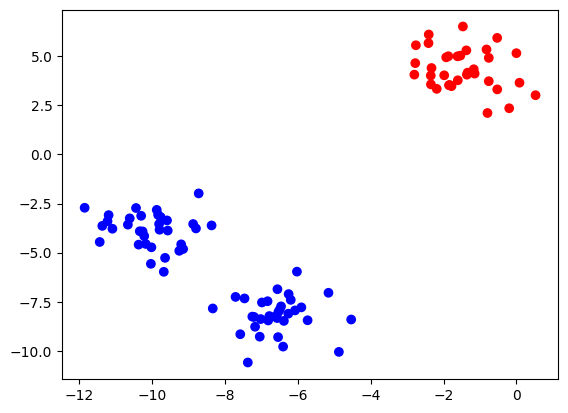

In [ ]:
plt.scatter(X[:,0],X[:,1], c=y, cmap='bwr')

Now let us fit the data to `Polynomialfeatures` to create additional polinomial features. Check the shape of the data before and after the transformation.

In [ ]:
poly = PolynomialFeatures(include_bias=False)

In [ ]:
X_poly = poly.fit_transform(X)

In [ ]:
X.shape, X_poly.shape

((100, 2), (100, 5))

In [ ]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

Fit `svc` with a linear kernel on the transformed dataset. Later, fit `svc` with a polynomial kernel on the original dataset. Check the coefficients, dual coefficients, and support for both linear and kernel svm models.

In [ ]:
#Takes longer than LinearSVC, don't do it.
svc_l = SVC(kernel='linear')
svc_p = SVC(kernel='poly', degree=2, coef0=1)

In [ ]:
svc_l.fit(X_poly, y)

SVC(kernel='linear')

In [ ]:
svc_p.fit(X,y)


SVC(coef0=1, degree=2, kernel='poly')

In [ ]:
svc_l.coef_

array([[ 0.00367173,  0.00956526, -0.02148975, -0.02891436, -0.01047885]])

In [ ]:
x_new = [[2.1, 1.1]]
x_new_p = poly.transform(x_new)

In [ ]:
svc_l.predict(x_new_p)

array([ True])

In [ ]:
x_new_p.shape

(1, 5)

In [ ]:
svc_l.coef_.shape

(1, 5)

In [ ]:
np.sign(np.dot(svc_l.coef_, x_new_p.T) + svc_l.intercept_)

array([[1.]])

In [ ]:
svc_l.intercept_

array([1.22880396])

In [ ]:
dc = svc_l.dual_coef_

In [ ]:
svc_l.support_

array([57, 83, 74, 80], dtype=int32)

In [ ]:
support = svc_l.support_

In [ ]:
support

array([57, 83, 74, 80], dtype=int32)

In [ ]:
X_sub=X_poly[[57, 83, 74, 80]]

In [ ]:
x_new_p

array([[2.1 , 1.1 , 4.41, 2.31, 1.21]])

In [ ]:
np.dot(x_new_p, X_sub.T).shape

(1, 4)

In [ ]:
dc = svc_l.dual_coef_

In [ ]:
dc.shape

(1, 4)

In [ ]:
np.dot(np.dot(x_new_p, X_sub.T), dc.T)

array([[-0.15600894]])

In [ ]:
svc_p.predict(x_new)

array([ True])

In [ ]:
# alpha_57* Q(x_57) * Q(x_new) + alpha83* Q(x_83) * Q(x_new) +

In [ ]:
svc_p.support_

array([57, 83,  0, 78], dtype=int32)

In [ ]:
svc_p.dual_coef_

array([[-0.23762828, -0.12680592,  0.15807967,  0.20635453]])

## Example 2

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

Load digits dataset from scikitlearn using `load_digits()` function, create train and test datasets. Print the fitst eight digits on the screen.

In [ ]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

Create a pipeline using `StandardScaler` and `SVC`. Find the cross validation score for both nont-scaled and scaled datasets for SVC.

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
pipe1 = make_pipeline(StandardScaler(), SVC())

Create a grid search for `C` and `gamma` parameters of `SVC`. turn the grid search results in to a dataframe and check the results.

In [ ]:
params = {'svc__C' :np.logspace(-3, 3, 10), 'svc__gamma':np.logspace(-3, 3, 10)}

In [ ]:
mygrid = GridSearchCV(pipe1, param_grid=params, cv=10)

In [ ]:
mygrid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'svc__gamma': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])})

In [ ]:
mygrid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1.666666666666666, gamma=0.33333333333333304))])

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
Data = pd.read_csv('/content/adult (2).csv')

# Function to introduce missing values
def introduce_missing_values(df, numerical_missing_range=(5, 10), categorical_missing_range=(5, 10)):
    for column in df.columns:
        missing_percentage = np.random.randint(*numerical_missing_range if df[column].dtype != 'object' else categorical_missing_range) / 100
        indices = np.random.choice(df.index, int(missing_percentage * len(df)), replace=False)
        if df[column].dtype == 'object':
            df.loc[indices, column] = '?'
        else:
            df.loc[indices, column] = np.NaN
    return df

# Create a new DataFrame with missing values
Data_with_missing_values = introduce_missing_values(Data.copy())


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Identify numerical and categorical columns
numerical_cols = Data_with_missing_values.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = Data_with_missing_values.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline with preprocessor and SVC classifier
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', SVC(kernel='rbf', C=1, gamma='scale'))])

# Split your data into training and testing sets
X = Data_with_missing_values.drop('target_column', axis=1)  # replace 'target_column' with your actual target column name
y = Data_with_missing_values['target_column']  # replace 'target_column' with your actual target column name

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
